<a href="https://colab.research.google.com/github/TadaoYamaoka/ShogiAIBook2/blob/main/notebook/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 共有アイテムのショートカット作成

* 共有リンクを開く
  * [ShogiAIBook](https://drive.google.com/drive/folders/13XZ-VQ58QoIJBZAg0RPM44-etsJtZNAG?usp=sharing)


* Google Drive の「共有アイテム」>「data」>「ShogiAIBook」を右クリックする
* 「ドライブにショートカットを追加」をクリックする
> 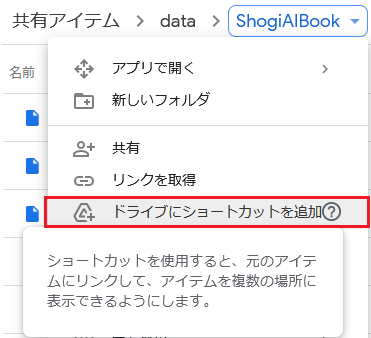

* 「ショートカットを追加」をクリックする
> 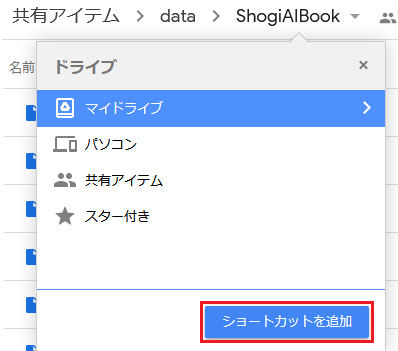

* 以降の手順は、「マイドライブ」直下に、ショートカットを設置した場合を想定する

### Tips
* Colab 以外の環境では、Google Drive からダウンロードするよりも、[rclone](https://rclone.org/) でデータをコピーする方が速く、確実です。
 * [install](https://rclone.org/install/)
 * [Google Drive](https://rclone.org/drive/)


## CUDAバージョンの確認

In [ ]:
!nvidia-smi

Sun Sep 19 05:55:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## タイムゾーンの変更

In [11]:
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Asia/Tokyo /etc/localtime
!date

Sun Oct 10 18:22:06 JST 2021


# Google Drive のマウント

In [1]:
# [Go to this URL in a browser:] -> [https://accounts.google.com/o/oauth2/auth?client_id=xxxxx ...] のリンクをクリックし、ログインする
# [Enter your authorization code:] -> 「このコードをコピーし、アプリケーションに切り替えて貼り付けてください。」のコードをコピーし、ペーストする

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* ```https://accounts.google.com/o/oauth2/auth?client_id=xxxxx ...``` のリンクをクリックする
> 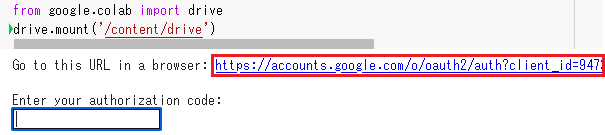

* 「Google Drive」を利用するアカウントをクリックする
> 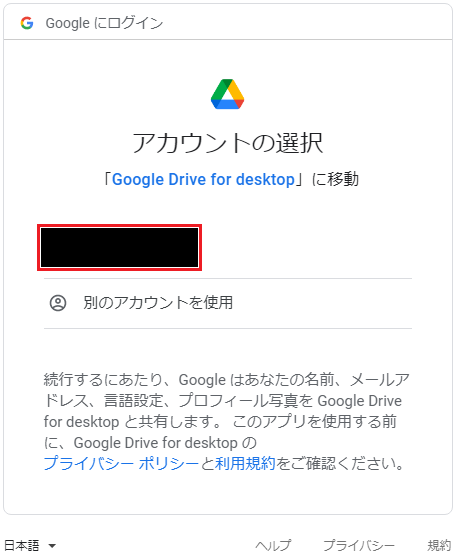

* 「ログイン」をクリックする
> 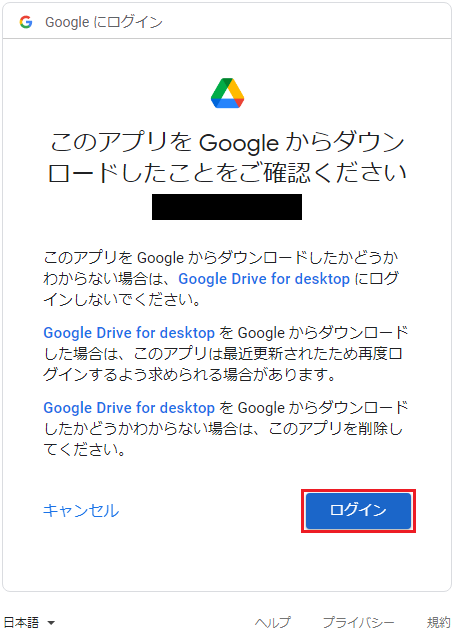

* 「コード」をコピーする
> 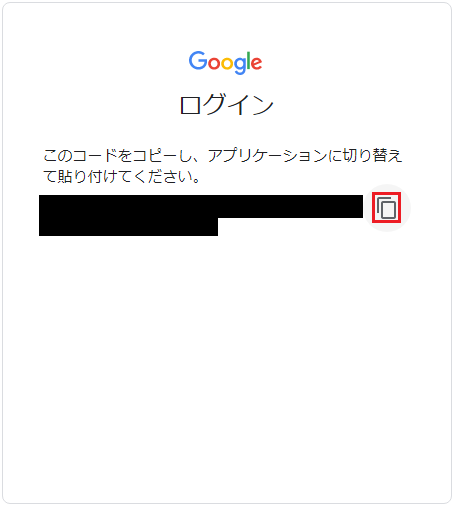

* ```Enter your authorization code:``` の入力欄にペーストし、「Enter」キーを押下する
> 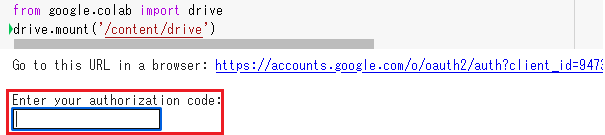

In [ ]:
!ls -ld "/content/drive/My Drive/"

drwx------ 13 root root 4096 Sep 19 14:56 '/content/drive/My Drive/'


## 作業ディレクトリの作成

In [2]:
!mkdir -p "/content/DeepLearningShogi/ShogiAIBook"
!mkdir -p "/content/drive/My Drive/DeepLearningShogi/ShogiAIBook"
!mkdir -p "/content/drive/My Drive/DeepLearningShogi/ShogiAIBook/model"
!mkdir -p "/content/drive/My Drive/DeepLearningShogi/ShogiAIBook/log"

## シンボリックリンクの作成

In [3]:
%cd /content/DeepLearningShogi/ShogiAIBook

/content/DeepLearningShogi/ShogiAIBook


In [4]:
!ln -s "/content/drive/My Drive/DeepLearningShogi/ShogiAIBook/log"   ./log
!ln -s "/content/drive/My Drive/DeepLearningShogi/ShogiAIBook/model" ./model
!ln -s "/content/drive/My Drive/ShogiAIBook"                         ./data

# dlshogiのインストール

## pip でインストールする場合

In [ ]:
# pip でインストールする場合
!pip install dlshogi==0.1.0

     |████████████████████████████████| 3.2 MB 7.9 MB/s 


## GitHub のソースからインストールする場合

In [5]:
%%bash
# GitHub のソースから、最新版をインストールする場合
# git clone https://github.com/TadaoYamaoka/DeepLearningShogi.git
# GitHub のソースから、v0.1.0をインストールする場合
git clone https://github.com/TadaoYamaoka/DeepLearningShogi.git -b v0.1.0
cd DeepLearningShogi
pip install --no-cache-dir -e .

Obtaining file:///content/DeepLearningShogi/ShogiAIBook/DeepLearningShogi
  Running setup.py develop for dlshogi


Cloning into 'DeepLearningShogi'...
Note: checking out 'dbb626c92adfd6153607761513d4188f6d48f91b'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [9]:
# ディレクトリを元の場所に戻す
%cd /content/DeepLearningShogi/ShogiAIBook

/content/DeepLearningShogi/ShogiAIBook


# データの確認

In [12]:
!ls -ld ./data/*

-rw------- 1 root root      2311 Sep 12 13:52 ./data/20210911_resnet10_swish_v10-048.txt
-rw------- 1 root root      2313 Sep 17 21:43 ./data/20210917_resnet10_swish_v10-072.txt
-rw------- 1 root root  88343082 Sep 12 13:41 ./data/checkpoint_resnet10_swish_v10-048.pth
-rw------- 1 root root  88343082 Sep 17 21:27 ./data/checkpoint_resnet10_swish_v10-072.pth
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-001.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-002.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-003.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-004.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-005.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-006.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-007.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-008.hcpe
-rw-----

# 学習

1 epochだけ試したい場合は、「last=72」の箇所を「last=1」に変更して実行してください。

In [ ]:
%%bash

# 学習するエポックの閾値の上限値。72エポック（24分割した教師データ*3サイクル）学習する。
last=72

# 変数設定
name="resnet10_swish"
log_dir="./log"
model_dir="./model"
data_dir="./data"

# 最新のチェックポイント+1から学習を再開する。
for i in $(ls -v ${model_dir}/checkpoint_${name}-???.pth 2>/dev/null); do last=$i; done
if [ -v last ]; then
    start=$(expr ${last: -7:3} + 1)
else
    start=1
fi

for ((i=$start; i<=$last; i++)); do
    iii=$(printf "%03d" $i)
    jjj=$(printf "%03d" $((i-1)))
    kkk=$(printf "%03d" $(((i-1) % 24 + 1)))

    # floodgate、水匠3改、dlshogi_with_gctの教師データ（24分割）を順番に学習する。
    src="${data_dir}/floodgate_2019-2021_r3500-${kkk}.hcpe ${data_dir}/suisho3kai-${kkk}.hcpe ${data_dir}/dlshogi_with_gct-${kkk}.hcpe"

    # チェックポイントが存在する場合、最新のチェックポイントから学習を継続する。
    if [ $i -eq 1 ]; then
        resume=""
    else
        resume="-r ${model_dir}/checkpoint_${name}-${jjj}.pth"
    fi

    # 最終エポックの学習のみモデルファイルを保存する。
    if [ $i -eq $last ]; then
        model="--model ${model_dir}/model_${name}-{epoch:03}"
    else
        model=""
    fi

    # チェックポイントファイル名
    checkpoint="${model_dir}/checkpoint_${name}-{epoch:03}.pth"

    # ログファイル名
    ### 日付を付与する場合
    # logbase="$(date '+%Y%m%d')_${name}"
    ### 日付を付与しない場合
    logbase="${name}"
    log="${log_dir}/${logbase}-${iii}.txt"

    # 前回中断時のログファイルがある場合、削除する。
    if [ -e ${log} ]; then
        rm -f ${log}
    fi

    # 学習
    python -m dlshogi.train                                            \
              ${src}                                                   \
              ${data_dir}/floodgate_test_2017-2018_r3500_eval5000.hcpe \
              --network ${name}                                        \
              ${resume}                                                \
              --checkpoint ${checkpoint}                               \
              ${model}                                                 \
              --lr 0.04                                                \
              --batchsize 4096                                         \
              --lr_scheduler "StepLR(step_size=24,gamma=0.1)"          \
              --use_swa                                                \
              --swa_start_epoch 10                                     \
              --use_average                                            \
              --use_evalfix                                            \
              --gpu 0                                                  \
              --use_amp                                                \
              --log ${log}
done

tcmalloc: large alloc 1610612736 bytes == 0x564b00950000 @  0x7f9806179887 0x7f979a2464ae 0x7f979a24686d 0x7f979a244724 0x7f979a244a3f 0x7f979a2413f9 0x5649e92654b0 0x5649e9265240 0x5649e92d90f3 0x5649e92d39ee 0x5649e9266bda 0x5649e92d8d00 0x5649e92d3ced 0x5649e91a5eb0 0x5649e92d5fe4 0x5649e92d39ee 0x5649e92d36f3 0x5649e92d1b60 0x5649e9265349 0x5649e9265240 0x5649e92d8973 0x5649e92d39ee 0x5649e9266bda 0x5649e92d4915 0x5649e92d39ee 0x5649e91a5eb0 0x5649e9377581 0x5649e937519a 0x5649e9374e0c 0x7f9804f61bf7 0x5649e9374cea
/content/DeepLearningShogi/ShogiAIBook/DeepLearningShogi/dlshogi/train.py:268: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip_grad_max_norm)
tcmalloc:

## 出力される警告
* 以下の警告については、学習が正常に行われていれば、問題ない。

> tcmalloc: large alloc xxxxxxxxxx bytes ...
* 教師データが多い場合に、[パフォーマンスツール](https://github.com/gperftools/gperftools) から出力される。
* 【参考】https://stackoverflow.com/questions/9077457/how-to-trace-tcmalloc-large-alloc

> FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. ...
* Inf or NaN が含まれている場合に、[PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html) から出力される。
* 【参考】https://discuss.pytorch.org/t/what-to-do-for-non-finite-warning-in-clip-grad-norm/127700


# ログの可視化

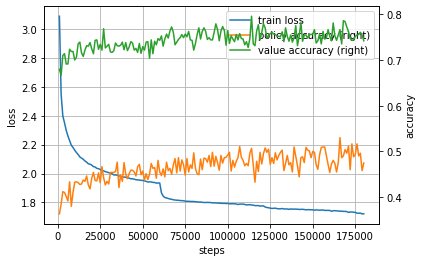

In [ ]:
# train
import dlshogi.utils
dlshogi.utils.plot_log_policy_value('./log/*.txt', *['--grid'])

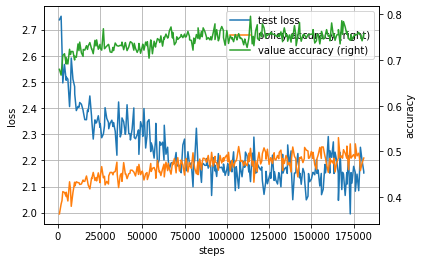

In [ ]:
# test
import dlshogi.utils
dlshogi.utils.plot_log_policy_value('./log/*.txt', *['--testloss', '--grid'])

# 学習済みファイルのコピー

1 epochだけ試した場合は、全て(72 epoch)学習したファイルをGoogleドライブからコピーしてください。処理は、コメントアウトしているため、コメントアウトをはずして実行してください。

In [13]:
#!cp ./data/checkpoint_resnet10_swish_v10-072.pth ./model/
#!cp ./data/model_resnet10_swish_v10-072 ./model/

# onnxモデル変換

In [ ]:
!python -m dlshogi.convert_model_to_onnx --network resnet10_swish ./model/model_resnet10_swish-072 ./model/model_resnet10_swish-072.onnx

graph(%input1 : Float(*, 62, 9, 9, strides=[5022, 81, 9, 1], requires_grad=0, device=cuda:0),
      %input2 : Float(*, 57, 9, 9, strides=[4617, 81, 9, 1], requires_grad=0, device=cuda:0),
      %l1_1_1.weight : Float(192, 62, 3, 3, strides=[558, 9, 3, 1], requires_grad=1, device=cuda:0),
      %l1_1_2.weight : Float(192, 62, 1, 1, strides=[62, 1, 1, 1], requires_grad=1, device=cuda:0),
      %l1_2.weight : Float(192, 57, 1, 1, strides=[57, 1, 1, 1], requires_grad=1, device=cuda:0),
      %l22.weight : Float(27, 192, 1, 1, strides=[192, 1, 1, 1], requires_grad=1, device=cuda:0),
      %l22_2.bias : Float(2187, strides=[1], requires_grad=1, device=cuda:0),
      %l23_v.weight : Float(256, 2187, strides=[2187, 1], requires_grad=1, device=cuda:0),
      %l23_v.bias : Float(256, strides=[1], requires_grad=1, device=cuda:0),
      %l24_v.weight : Float(1, 256, strides=[256, 1], requires_grad=1, device=cuda:0),
      %l24_v.bias : Float(1, strides=[1], requires_grad=1, device=cuda:0),
      %

In [ ]:
!ls -l ./model/model_resnet10_swish-072.onnx

-rw------- 1 root root 29379421 Sep 26 15:02 ./model/model_resnet10_swish-072.onnx
